In [31]:
import pandas as pd

sensor_data = "003_91dc3428-46c3-4d80-865c-e6e.csv"
cognitive_phase_data = "resp 3 cognitive tasks.csv"

df_sensor = pd.read_csv(sensor_data, low_memory=False)
df_phases = pd.read_csv(cognitive_phase_data)

df_sensor.head()
df_phases.head()

# print(df_sensor['Timestamp'].dtype)
# print(df_phases['Time Started'].dtype)



,Time Started,Cognitive Task,Screens
0,0:00:16,Explore,Supporting material
1,0:01:00,Explore,Supporting material
2,0:01:44,Explore,Supporting material
3,0:02:46,Explore,"Map, Filter, supporting material"
4,0:03:02,Explore,Map (performance)


In [32]:
import datetime

# Define a function to convert a time string to milliseconds
def time_to_ms(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()  # Parse time string to time object
    delta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)  # Create timedelta object
    ms = delta_obj.total_seconds() * 1000  # Convert to milliseconds
    return ms

# Convert the 'Time Started' column to milliseconds
df_phases['Time Started'] = df_phases['Time Started'].apply(time_to_ms)

# Print the resulting DataFrame
print(df_phases)
print(df_phases['Time Started'].dtype)


     Time Started Cognitive Task                           Screens
0         16000.0        Explore               Supporting material
1         60000.0        Explore               Supporting material
2        104000.0        Explore               Supporting material
3        166000.0        Explore  Map, Filter, supporting material
4        182000.0        Explore                 Map (performance)
..            ...            ...                               ...
105     2340000.0        Explore                   Map, statistics
106     2346000.0       Conclude                               Map
107     2360000.0       Conclude          Supporting material, map
108     2380000.0       Conclude                            Filter
109     2430000.0       Conclude                               NaN

[110 rows x 3 columns]
float64


In [33]:
merged_df = pd.merge_asof(df_sensor, df_phases, left_on='Timestamp', right_on='Time Started')
final_df = merged_df[['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion','Cognitive Task', 'Screens']]
final_df.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
0,36522.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explore,Supporting material
1,36540.0,0.124517,0.182482,0.023478,0.127476,0.027181,0.125768,0.056677,0.328766,0.0,0.290252,0.007409,Explore,Supporting material
2,36540.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explore,Supporting material
3,36591.0,0.124995,0.184449,0.023551,0.126825,0.026971,0.126182,0.056253,0.328766,0.0,0.382996,0.016253,Explore,Supporting material
4,36626.0,0.125877,0.187244,0.023729,0.127308,0.026426,0.126763,0.056174,0.328766,0.0,0.414892,0.017531,Explore,Supporting material


In [34]:
#Remove rows with empty emotions data
final_df = final_df.dropna(subset=['Contempt'])

# Check if a categorical value exists in the DataFrame
if final_df['Cognitive Task'].isin(['Explore']).any():
    print('The categorical value exists in the DataFrame')
else:
    print('The categorical value does not exist in the DataFrame')

final_df.to_csv('003-91dc3428_emotions_with_cognitive_tesk_and_screen.csv', index=False)
final_df.tail()

The categorical value exists in the DataFrame


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
146171,2477397.0,0.159918,0.199071,0.036735,0.199124,0.024523,0.121992,0.072197,0.328766,0.0,0.269123,0.008675,Conclude,NaN
146173,2477428.0,0.152546,0.203217,0.033635,0.181088,0.024471,0.124029,0.068194,0.328766,0.0,0.226632,0.009204,Conclude,NaN
146175,2477460.0,0.145856,0.203593,0.031161,0.169411,0.024488,0.125848,0.066089,0.328766,0.0,0.226944,0.009375,Conclude,NaN
146177,2477491.0,0.140343,0.205834,0.029277,0.161164,0.024488,0.126543,0.064886,0.328766,0.0,0.210516,0.009474,Conclude,NaN
146178,2477523.0,0.135568,0.210283,0.027627,0.153636,0.024495,0.127775,0.063522,0.328766,0.0,0.200138,0.009230,Conclude,NaN


In [35]:
display(final_df.sample(15))

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
100070,1707223.0,1.374880,0.185481,0.654385,1.023741,0.025334,0.125467,0.114894,63.420792,0.0,0.145490,0.088956,Assess Results,Statistics
95768,1635508.0,0.132638,0.193747,0.026371,0.138049,0.026718,0.122993,0.185404,0.328766,0.0,0.026000,0.001911,Assess Results,Filter
122423,2080375.0,0.591276,0.169645,0.024588,0.872557,0.024223,0.120573,0.427764,11.618893,0.0,0.193221,0.098172,Assess Results,Map
37183,657251.0,1.257082,0.187411,0.753295,1.039999,0.028076,0.122080,1.281395,69.202034,0.0,0.047918,0.010335,Test Hypothesis,Filter
108538,1848521.0,1.251702,0.186416,0.640030,0.947386,0.024862,0.127321,1.669711,62.390648,0.0,0.018629,0.010077,Explore,Statistics
121071,2057814.0,1.395328,1.720041,1.327837,1.590357,0.027701,0.120345,4.015808,82.452759,0.0,1.178766,2.038868,Test Hypothesis,Filter
61761,1068349.0,0.216770,0.187690,0.028825,0.239705,0.024188,0.126345,0.103197,0.328766,0.0,0.050849,0.028529,Test Hypothesis,Filter
32275,575210.0,2.084776,0.242408,0.546934,2.823221,0.028531,0.188521,3.521535,78.882088,0.0,0.089302,0.022275,Set Goal,Statistics
118315,2011865.0,2.490732,0.168566,0.612225,2.692123,0.024259,0.122433,1.064885,69.102570,0.0,0.011163,0.003438,Test Hypothesis,Filter
89796,1535979.0,2.613198,0.180063,0.024759,3.897034,0.024392,0.123800,2.111381,0.328766,0.0,0.107670,0.004838,Generate Hypothesis,Filter


In [36]:
display(final_df.describe())

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion
count,7.311900e+04,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000
mean,1.257174e+06,2.012766,0.558066,0.342764,2.636521,1.087325,0.135048,3.317782,35.567201,1.156507,0.339462,0.134676
std,7.045893e+05,4.519206,3.920136,0.555571,6.807691,10.005670,0.249280,9.813093,34.816160,10.095268,0.868025,0.732617
min,3.654000e+04,0.003705,0.000021,0.006188,0.041279,0.024042,0.005518,0.055338,0.328766,-45.083767,0.000320,0.000166
25%,6.467795e+05,0.168212,0.170994,0.026189,0.180939,0.024327,0.121300,0.080309,0.328766,0.000000,0.027586,0.011523
50%,1.257611e+06,0.998678,0.186814,0.238133,0.947007,0.024843,0.126304,0.311725,28.883924,0.000000,0.081228,0.030473
75%,1.867240e+06,1.438978,0.193553,0.648991,1.547494,0.026452,0.128724,2.570031,67.226921,0.000000,0.276837,0.081493
max,2.477523e+06,93.730980,91.378159,63.556683,99.461021,99.979492,10.356455,99.971573,99.981049,99.871223,42.219398,44.869358


In [37]:
# Create medians df
medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).median()
# Reset index and add 'Cognitive Task' as a column
medians = medians.reset_index()
medians['Cognitive Task'] = medians['Cognitive Task']

# Print the medians dataframe
print(medians)
medians.head()

        Cognitive Task     Anger  Contempt   Disgust      Fear       Joy  \
0       Assess Results  1.136012  0.187128  0.412329  0.978419  0.024819   
1             Conclude  0.931860  0.186849  0.165526  0.942178  0.024566   
2              Explore  0.832270  0.184943  0.148066  0.882541  0.025362   
3                Focus  1.059924  0.185421  0.501715  0.963259  0.025023   
4  Generate Hypothesis  1.268038  0.184735  0.636721  1.088460  0.024654   
5             Set Goal  0.332365  0.191745  0.036244  0.348260  0.024906   
6      Test Hypothesis  1.009588  0.188708  0.198382  0.942887  0.024534   

    Sadness  Surprise  Engagement  Sentimentality  Confusion  
0  0.125970  0.440505   41.635345        0.075376   0.038607  
1  0.126442  0.269486   10.376647        0.068042   0.027718  
2  0.125959  0.254757   23.079073        0.107916   0.025861  
3  0.125985  0.190724   54.991669        0.048214   0.020014  
4  0.126041  1.110411   64.516083        0.050751   0.032448  
5  0.127618  

,Cognitive Task,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion
0,Assess Results,1.136012,0.187128,0.412329,0.978419,0.024819,0.125970,0.440505,41.635345,0.075376,0.038607
1,Conclude,0.931860,0.186849,0.165526,0.942178,0.024566,0.126442,0.269486,10.376647,0.068042,0.027718
2,Explore,0.832270,0.184943,0.148066,0.882541,0.025362,0.125959,0.254757,23.079073,0.107916,0.025861
3,Focus,1.059924,0.185421,0.501715,0.963259,0.025023,0.125985,0.190724,54.991669,0.048214,0.020014
4,Generate Hypothesis,1.268038,0.184735,0.636721,1.088460,0.024654,0.126041,1.110411,64.516083,0.050751,0.032448


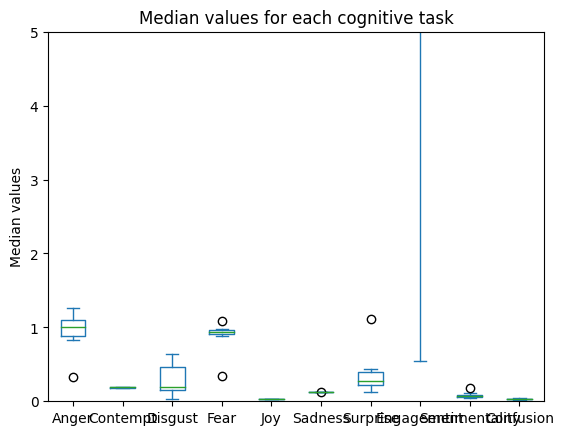

In [38]:
import matplotlib.pyplot as plt


# create a box plot of the medians
medians.plot(kind='box')

plt.ylim(0, 5)

# set the plot title and axis labels
plt.title('Median values for each cognitive task')
plt.ylabel('Median values')

# display the plot
plt.show()

In [39]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print the column names in the dataframe
print(medians.columns)

# Encode 'Cognitive Task' column into numerical values
le = LabelEncoder()
medians['Cognitive Task Encoded'] = le.fit_transform(medians['Cognitive Task'])



Index(['Cognitive Task', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion'],
      dtype='object')


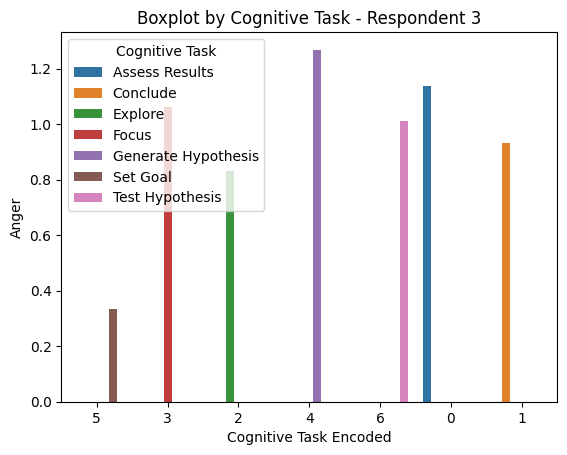

In [70]:
import matplotlib.pyplot as plt

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Display the plot
plt.show()


In [44]:
# Create medians df
general_medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].median()
general_medians.head(20)


Anger              0.998678
Contempt           0.186814
Disgust            0.238133
Fear               0.947007
Joy                0.024843
Sadness            0.126304
Surprise           0.311725
Engagement        28.883924
Sentimentality     0.081228
Confusion          0.030473
dtype: float64

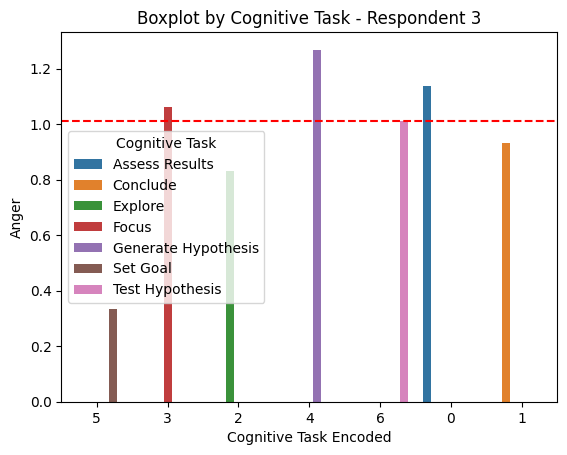

In [71]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Get the original string labels from the LabelEncoder
le = LabelEncoder()
le.fit(medians['Cognitive Task'])
labels = le.inverse_transform([5,3,2,4,6,0,1])  


# Display the plot
plt.show()


Wrong Lables below!!!

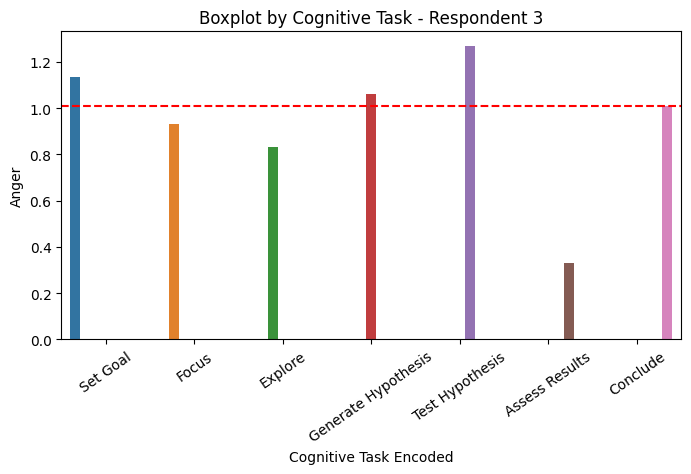

In [85]:
import matplotlib.pyplot as plt

# Define a dictionary to map encoded labels to their corresponding original labels
label_map = {0: 'Assess Results', 1: 'Conclude', 2: 'Explore', 3: 'Focus', 4: 'Generate Hypothesis', 5: 'Set Goal', 6: 'Test Hypothesis'}

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(8,4))

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task')

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Define the desired order of the labels as a list
ordered_labels = [label_map[i] for i in [5,3,2,4,6,0,1]]

# Set the x-axis tick labels using the ordered_labels list
plt.xticks(range(len(label_map)), ordered_labels, rotation=35, fontsize=10)

plt.legend().remove()
# Display the plot
plt.show()


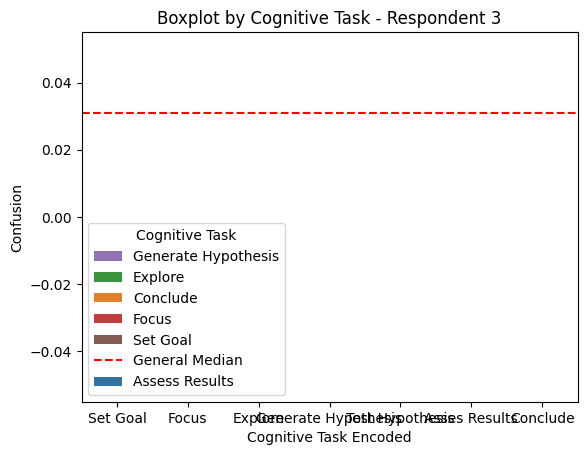

In [53]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Confusion'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Confusion', data=medians, hue='Cognitive Task', order=['Set Goal','Focus', 'Explore', 'Generate Hypothesis', 'Test Hypothesis', 'Asses Results', 'Conclude'])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Reorder the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [5,3,2,4,6,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Cognitive Task')

# Display the plot
plt.show()
